In [381]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

#Import Library For Technical Indicators
import ta

#Import Path Libraries
import os
from os import listdir
from os.path import isfile, join

#Importing Runtime Library
from tqdm import tqdm

#Importing Plotting Library
import matplotlib.pyplot as plt

In [382]:
####-------------------- Dataset Import ------------------------------------####

In [383]:
mypath = "/Users/jakob/OneDrive - Universitat Ramón Llull/TechLabsProj/cnn_input/stocks_kaggle"
onlyfiles = sorted(listdir(mypath))

In [384]:
input_df = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'])

In [385]:
## merging files in one df ##

file_list = [] # create list with files in dataset
for file in tqdm(onlyfiles[:100]):
    print(file)
    filesize = os.path.getsize(f'{mypath}/{file}')
    
    if filesize == 0:
        pass
    else:
        price_data = pd.read_csv(f'{mypath}/{file}')
        price_data['security_name'] = file #add name of file to dataset
        input_df = pd.concat([input_df, price_data])
        file_list.append(file)
        print(len(input_df))
        
price_data = input_df


  9%|▉         | 9/100 [00:00<00:01, 82.12it/s]

a.us.txt
4521
aa.us.txt
16595
aaap.us.txt
17100
aaba.us.txt
22534
aac.us.txt
23319
aal.us.txt
24308
aamc.us.txt
25519
aame.us.txt
28445
aan.us.txt
31646
aaoi.us.txt
32687
aaon.us.txt
35888
aap.us.txt
39089
aapl.us.txt
47453
aat.us.txt
49170
aau.us.txt



 21%|██        | 21/100 [00:00<00:01, 64.49it/s]

52347
aav.us.txt
55546
aaww.us.txt
58708
aaxn.us.txt
61909
ab.us.txt
65110
abac.us.txt
66937
abax.us.txt
70138
abb.us.txt
73339
abbv.us.txt
74563
abc.us.txt
80254
abcb.us.txt



 31%|███       | 31/100 [00:00<00:01, 51.85it/s]

83455
abcd.us.txt
85425
abco.us.txt
88626
abdc.us.txt
89511
abe.us.txt
92701
abeo.us.txt
93430
abeow.us.txt
93945
abev.us.txt
96464
abg.us.txt
99665
abil.us.txt



 36%|███▌      | 36/100 [00:00<00:01, 46.17it/s]

100135
abio.us.txt
103336
ablx.us.txt
103349
abm.us.txt
106550
abmd.us.txt
109749
abr.us.txt
112950
abr_a.us.txt
114094
abr_b.us.txt



 45%|████▌     | 45/100 [00:00<00:01, 35.80it/s]

115136
abr_c.us.txt
115968
abrn.us.txt
116843
abt.us.txt
125569
abtx.us.txt
126098
abus.us.txt
128547
abx.us.txt



 49%|████▉     | 49/100 [00:01<00:01, 31.63it/s]

136802
aby.us.txt
137664
ac.us.txt
138155
acad.us.txt
141355
acbi.us.txt
141867
acc.us.txt
145068
acco.us.txt



 57%|█████▋    | 57/100 [00:01<00:01, 31.66it/s]

148152
accp.us.txt
acer.us.txt
151277
acerw.us.txt
151912
acet.us.txt
155113
acfc.us.txt
156665
acgl.us.txt
159866
acglo.us.txt



 65%|██████▌   | 65/100 [00:01<00:01, 28.48it/s]

159925
acglp.us.txt
160205
ach.us.txt
163394
achc.us.txt
164910
achn.us.txt
167690
achv.us.txt
170890
acia.us.txt



 71%|███████   | 71/100 [00:01<00:01, 26.75it/s]

171269
aciu.us.txt
171556
aciw.us.txt
174757
acls.us.txt
177958
acm.us.txt
180606
acmr.us.txt
180612
acn.us.txt



 74%|███████▍  | 74/100 [00:02<00:01, 25.15it/s]

183813
acnb.us.txt
186658
acor.us.txt
189617
acp.us.txt
191324
acre.us.txt
192721
acrs.us.txt



 80%|████████  | 80/100 [00:02<00:00, 23.14it/s]

193250
acrx.us.txt
194924
acsf.us.txt
195888
acsi.us.txt
196147
acst.us.txt
197357
acta.us.txt



 86%|████████▌ | 86/100 [00:02<00:00, 22.27it/s]

200558
actg.us.txt
203759
acu.us.txt
206843
acv.us.txt
207468
acxm.us.txt
210669
acy.us.txt



 89%|████████▉ | 89/100 [00:02<00:00, 21.17it/s]

213708
adap.us.txt
214345
adbe.us.txt
222221
adc.us.txt
225422
ades.us.txt



 92%|█████████▏| 92/100 [00:02<00:00, 20.21it/s]

225762
adhd.us.txt
226891
adi.us.txt
235289
adm.us.txt
244015
adma.us.txt



 97%|█████████▋| 97/100 [00:03<00:00, 17.96it/s]

244770
admp.us.txt
250240
adms.us.txt
251146
adnt.us.txt
251405
adom.us.txt



100%|██████████| 100/100 [00:03<00:00, 28.88it/s][A

251510
adp.us.txt
260234


In [386]:
####-------------------- Technical Implementation ------------------------------------####

In [387]:
#### RSI - Relative Strength Index ####
def rsi(price_data, price_index, lookback=14):
    
    def rsi_inner(data):   
        gain = data[data>0].mean()
        loss = -1*data[data<0].mean()    
        return 100 * gain / (gain + loss)
    
    price_data['return'] = ((price_data.iloc[:, price_index] / price_data.iloc[:, price_index].shift(1)) -1).fillna(0)
    price_data['rsi'] = price_data['return'].rolling(center=False, window=lookback).apply(rsi_inner).fillna(0)
    
    #defining buy and sell signal threshold
    rsi_buy = 30
    rsi_sell = 70
    
    #apply signals as additional feature
    price_data['rsi_signal'] = 0 #neutral signal
    price_data.loc[price_data['rsi'] < rsi_buy , 'rsi_signal'] = 1 #buy signal
    price_data.loc[price_data['rsi'] > rsi_sell , 'rsi_signal'] = -1 #sell signal
    
    price_data.drop(['return'], axis=1, inplace=True)
    return price_data

#price_data = rsi(price_data, price_index = 2)
price_data = rsi(price_data, price_index = 2)

In [388]:
#### Bollinger Bands ####
def bbands(data, price_index, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = data.iloc[:, price_index].rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = data.iloc[:, price_index].rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    
    data['bb_upper'] = np.round(upband,3)
    data['bb_mid'] = np.round(ave,3)
    data['bb_lower'] = np.round(dnband,3)
    return data

price_data = bbands(price_data, 2)

In [389]:
#### Volume (Plain) ####
def volume (data):
    data['Volume'].fillna(0)
    return data

price_data = volume(price_data)

In [390]:
#### Aroon Oscillator ####
def aroon(df, tf=25, high='High', low='Low'):
    aroonup = []
    aroondown = []
    x = tf
    
    #fill up dataframe with 0 for values below time threshold
    aroonup = [0] * tf
    aroondown = [0] * tf
        
    while x < len(df['Date']):
        aroon_up = ((df[high][x-tf:x].tolist().index(max(df[high][x-tf:x])))/float(tf))*100
        aroon_down = ((df[low][x-tf:x].tolist().index(min(df[low][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    
    df['aroonup'] = aroonup
    df['aroondown'] = aroondown
    
    ##Implement Trading Signals
    #When the Aroon Up is above the Aroon Down, it indicates bullish price behavior.
    #When the Aroon Down is above the Aroon Up, it signals bearish price behavior.
    df['aroon_sig'] = 0 
    df.loc[df['aroonup'] > df['aroondown'], 'aroon_sig'] = 1 #buy signal
    df.loc[df['aroondown'] > df['aroonup'], 'aroon_sig'] = -1
    return df


#price_data = pd.read_csv('./cnn_input/stocks_kaggle/abio.us.txt')
#price_data = aroon(price_data)
price_data = aroon(price_data, high='High', low='Low')

In [391]:
#### Price-Volume-Trend-Indicator ####
def pvt(data, signal_len = 14):
    data['momentum'] = (data['Close'] - data['Close'].shift(1)).fillna(0)
    data["PVT"] = (data['momentum'] / data['Close'].shift(1))*data['Volume']
    data["PVT"] = data["PVT"]-data["PVT"].shift(1)
    data["PVT"] = data["PVT"].fillna(0)
    
    ##Implement Trading Signals
    data['pvt_movmean'] = data['PVT'].rolling(signal_len).mean() #signal line as moving average 
    data['pvt_signal'] = 0
    data.loc[data['PVT'] > data['pvt_movmean'], 'pvt_signal'] = 1 #buy signal
    data.loc[data['PVT'] < data['pvt_movmean'], 'pvt_signal'] = -1 #sell signal
    
    data.drop(['momentum'], axis = 1, inplace = True)
    return data

#price_data = pvt(price_data)

In [392]:
#### Acceleration Bands ####
def abands(df, window = 20, high='High', low='Low'):
    
    df['AB_Middle_Band'] = df['Close'].rolling(window = window, center=False).mean()
    
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df[high] * (1 + 4 * (df[high]-df[low])/(df[high]+df[low]))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=window, center=False).mean()
        
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df[low] * (1 - 4 * (df[high]-df[low])/(df[high]+df[low]))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=window, center=False).mean()
    
    ##Implement Trading Signals
    df['abbands_sig'] = 0
    df.loc[df[high] > df['AB_Upper_Band'], 'abbands_sig'] = 1 #buy signal
    df.loc[df[low] > df['AB_Lower_Band'], 'abbands_sig'] = -1 #sell signal 
    
    df.drop(['adownband', 'aupband'], axis = 1, inplace = True) 
    return df
    
price_data = abands(price_data, high='High', low='Low')

In [393]:
#### Stochastic ####
def stochastic (price_data):
    
    # Creating %k 
    price_data['stoch_k'] = ta.momentum.stoch(high = price_data['High'], low = price_data['Low'], 
                                                 close = price_data['Close'], n=14, d_n=3, fillna=False)
    
    # Creating %d
    price_data['stoch_d'] = ta.momentum.stoch_signal(high = price_data['High'], low = price_data['Low'], 
                                                 close = price_data['Close'], n=14, d_n=3, fillna=False)
    
    # Setting the stoch_signal to 0 for neutral indication
    price_data['stoch_signal'] = 0
    
    # If stoch_k or stoch_d is over 80, then there is a signal to sell (overbought conditions)
    # So when either is over 80, and then stoch_k crosses stoch_d from below, then sell  -1
    price_data.loc[((price_data['stoch_k'] < price_data['stoch_d']) & (price_data['stoch_k'].shift(1) > price_data['stoch_d'].shift(1))) & (price_data['stoch_d'] > 80), 'stoch_signal'] = '-1'
    
    # If stoch_k or stoch_d is less than 20, then there is a signal to buy
    # So when either is less than 20, and then stoch_k crosses stoch_d from above, then buy  1
    price_data.loc[((price_data['stoch_k'] > price_data['stoch_d']) & (price_data['stoch_k'].shift(1) < price_data['stoch_d'].shift(1))) & (price_data['stoch_d'] < 20), 'stoch_signal'] = '1'  
    
    # Drop stoch_k and stoch_d
    #price_data  = price_data.drop(['stoch_k', 'stoch_d'], axis=1)
    
    # Making stoch_signal numeric
    price_data['stoch_signal'] = pd.to_numeric(price_data['stoch_signal'])
    
    return price_data

price_data = stochastic(price_data)

In [394]:
#### Chaikin Money Flow ####

def chaikin_money_flow (price_data):
    
    # n = 20 days as the standard
    price_data['CMF'] = ta.volume.chaikin_money_flow(high = price_data['High'], low = price_data['Low'], 
                                                                close = price_data['Close'], 
                                                                volume = price_data['Volume'], n = 20)
    # Buy & sell signals
    signs = np.sign(price_data.CMF)
    price_data['CMF_signal'] = np.sign(signs.diff()).fillna(0)

    # Making CMF_signal numeric
    price_data['CMF_signal'] = pd.to_numeric(price_data['CMF_signal'])
    
    return price_data

price_data = chaikin_money_flow(price_data)

In [395]:
#### Rate of Change ####

def rate_of_change(price_data, n = 9):
    
    """
    :param price_data: pandas.DataFrame
    :param n: 9,14,25 days common for short term traders
    :return: pandas.DataFrame
    :sell signal: from positive to negative 
    "buy signal: from negative to postive"
    """
    
    M = price_data['Close'].diff(n - 1)
    N = price_data['Close'].shift(n - 1)
    ROC = pd.Series(M / N, name='ROC')
    price_data['ROC'] = ROC
    
    # Buy & sell signals
    signs = np.sign(price_data.ROC)
    price_data['ROC_signal'] = np.sign(signs.diff()).fillna(0)
    
    # Making ROC_signal numeric
    price_data['ROC_signal'] = pd.to_numeric(price_data['ROC_signal'])
    
    return price_data

price_data = rate_of_change(price_data)

In [396]:
#### Commodity Channel Index####
def CCI(data, ndays=14): 
    TP = (data['High'] + data['Low'] + data['Close']) / 3 
    CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015*TP.rolling(ndays).std()),
                    name = 'CCI') 
    
    data['CCI'] = CCI
    #defining buy and sell signal threshold
    cci_buy = 100
    cci_sell = -100
    #apply signals as additional feature
    price_data['cci_sig'] = 0 #neutral signal
    price_data.loc[price_data['CCI' ] > cci_buy , 'cci_sig'] = 1 #buy signal
    price_data.loc[price_data['CCI'] < cci_sell , 'cci_sig'] = -1 #sell signal
    
    return data

price_data = CCI(price_data)

In [397]:
#### Keltner Channels ####

def keltner_channel(df, n=14):
    KelChM = pd.Series(((df['High'] + df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChM_' + str(n))
    KelChU = pd.Series(((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChU_' + str(n))
    KelChD = pd.Series(((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3).rolling(n, min_periods=n).mean(),
                       name='KelChD_' + str(n))
    df['KelChM'] = KelChM
    df['KelChU'] = KelChU
    df['KelChD'] = KelChD
    return df

price_data = keltner_channel(price_data)

In [398]:
#### Exponential Moving Average ####
def exponential_moving_average(df, n=14):
    
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    df['EMA'] = EMA
    return df

price_data = exponential_moving_average(price_data)

In [399]:
#### Moving Average Convergence Divergence ####
def macd(price_data):
    price_data['26_ema'] = price_data['Close'].ewm(span=26).mean()
    price_data['12_ema'] = price_data['Close'].ewm(span=12).mean()
    price_data['MACD'] = price_data['12_ema'] - price_data['26_ema']
    price_data['Signal Line'] = price_data["MACD"].ewm(span=9).mean()
    price_data['Signal Line Crossover'] = np.where(price_data['MACD'] > price_data['Signal Line'], 1, 0)
    price_data['Signal Line Crossover'] = np.where(price_data['MACD'] < price_data['Signal Line'], -1, price_data['Signal Line Crossover'])
    price_data['Centerline Crossover'] = np.where(price_data['MACD'] > 0, 1, 0)
    price_data['Centerline Crossover'] = np.where(price_data['MACD'] < 0, -1, price_data['Centerline Crossover'])
    price_data["MACD_Indicator"] = np.sign(price_data['Signal Line Crossover'] - price_data['Signal Line Crossover'].shift(1))

    return price_data

price_data = macd(price_data)

In [400]:
#### Money Flow Index ####
def mfi(mfi):
    mfi = price_data.copy() 

    mfi['typical_price'] = (mfi['High'] + mfi['Low'] + mfi['Close'])/3

    mfi['raw_money_flow'] = mfi['typical_price']* mfi['Volume']

    mfi['shifted_raw_money_flow'] = mfi['raw_money_flow'].shift(1)

    mfi['positive_money_flow'] = np.where(mfi['shifted_raw_money_flow'] - mfi['raw_money_flow'] < 0, 1, 0)
    mfi['negative_money_flow'] = np.where(mfi['shifted_raw_money_flow'] - mfi['raw_money_flow'] > 0, 1, 0)

    mfi["money_flow_ratio"] = mfi.positive_money_flow.rolling(14).sum() / mfi.negative_money_flow.rolling(14).sum()

    mfi["money_flow_index"] = 100 - 100/(1+mfi["money_flow_ratio"])
    return mfi

price_data = mfi(price_data)

In [401]:
#### Ichimoku ####
def ichimoku(ichimoku):
    ichimoku["turning_line"] = (ichimoku.High.rolling(9).max() + ichimoku.Low.rolling(9).min())/2
    ichimoku["std_line"] = (ichimoku.High.rolling(26).max() + ichimoku.Low.rolling(26).min())/2
    ichimoku["leading_span_1"] = ((ichimoku["turning_line"] + ichimoku["std_line"])/2).shift(26)
    ichimoku["leading_span_2"] = ((ichimoku.High.rolling(52).max() + ichimoku.Low.rolling(52).min())/2).shift(26)
    return ichimoku

price_data = ichimoku(price_data)


In [402]:
#### Minmax Volume ####
def minmax(minmax):
    minmax['MIN_Volume'] = minmax['Volume'].rolling(14).min()
    minmax['MAX_Volume'] = minmax['Volume'].rolling(14).max()
    return minmax

price_data = minmax(price_data)


In [403]:
def william_r(william):
    william["%R"] = -100*((william["High"].rolling(14).max()-william["Close"])/(william["High"].rolling(14).max()-william["Low"].rolling(14).min()))
    
    return william

price_data = william_r(price_data)

In [404]:
price_data1 = price_data #safe copy

In [405]:
####-------------------- Export Dataset for Image Transformation ------------------------------------####

In [406]:
#### Drop unnecessary columns (keep just columns relevant for CNN) ####
price_data.drop(['Date', 'High', 'Low', 'Open', 'OpenInt', 'Volume'], axis=1, inplace=True)

#drop signals (for processing with return pos/neg as target -> compute signals for later use!!)
price_data.drop(['rsi_signal', 'aroon_sig', 'abbands_sig',
                 'stoch_signal', 'CMF_signal', 'ROC_signal',
                 'cci_sig', 'positive_money_flow', 'negative_money_flow', 'money_flow_ratio',
                 'money_flow_index', 'MIN_Volume', 'MAX_Volume'], inplace=True, axis=1)

price_data['return'] = price_data['Close'].pct_change() #compute daily returns from prices (target)
price_data.dropna(axis=0, inplace=True) #drop rows with NAs
#price_data.drop('Close', axis=1, inplace=True) # drop raw price development

In [407]:
'''
The rolling computation of the returns leads to falsely coputed returns as the rolling calculation runs across
securities. Therefore, the first datapoint of each security needs to be dropped.
'''
#create temporary copy for cleaned data
price_data_updated = pd.DataFrame(columns = price_data.columns)

for s in file_list: # iterate all files that have been incorporated in the dataset
    copy = price_data[price_data['security_name']==s] #extract each company from the whole population
    copy = copy.iloc[1:, :] #drop the first row of each company (since return falsely computed in these)
    price_data_updated = pd.concat([price_data_updated, copy]) #input cleaned set into the clean copy
    
price_data_updated.drop('security_name', axis=1, inplace=True)
price_data = price_data_updated

In [408]:
#### Normalizing Values On Column Basis ####
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

mm_scaler = MinMaxScaler(feature_range=(0, 1))
for col in price_data.columns[:-1]:
    price_data[col] = mm_scaler.fit_transform(price_data[col].values.reshape(-1, 1))

In [409]:
#### Export to CSV ####
price_data.to_csv('/Users/jakob/OneDrive - Universitat Ramón Llull/TechLabsProj/cnn_input/cnn_fullpriceinput.csv')

In [410]:
####-------------------- Dataset Exploratory Analysis ------------------------------------####

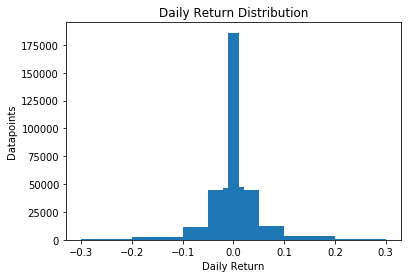

In [411]:
plt.hist(price_data_copy['return'], [-.3, -.2, -.1, -.05, -.02, -.01, .01,.02, .05, .1, .2, .3])
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Datapoints')
plt.show()

In [412]:
mean = price_data['return'].mean()
median = price_data['return'].median()
max_ = price_data['return'].max()
min_ = price_data['return'].min()

In [413]:
print(f'MEAN: {round(mean, 2)}')
print(f'MEDIAN: {round(median, 2)}')
print(f'MAX: {round(max_, 2)}')
print(f'MIN: {round(min_, 2)}')

MEAN: 0.0
MEDIAN: 0.0
MAX: 14.0
MIN: -0.91
